Nuggets Lineup Optimization: Finding the Best Lineups Without Jokić
Analyzing Denver's Bench Unit Performance (2025-26 Season)
Author: Zach Peterschmidt
Objective: Identify which Nuggets lineup combinations perform best when Nikola Jokić is not on the court, analyzing both offensive and defensive effectiveness.
Context: The 2025-26 season has been challenging for Denver with Jokić missing significant time due to injury, creating an opportunity to analyze depth lineups under real game conditions.

In [1]:
# Import libraries
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.static import players
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("=" * 70)
print("NUGGETS LINEUP ANALYSIS - JOKIĆ-LESS LINEUPS")
print("=" * 70)
print("\n🏀 Objective: Identify optimal Nuggets lineups when Jokić sits")
print("✓ Libraries loaded successfully!")

NUGGETS LINEUP ANALYSIS - JOKIĆ-LESS LINEUPS

🏀 Objective: Identify optimal Nuggets lineups when Jokić sits
✓ Libraries loaded successfully!


In [2]:
print("\n📥 Loading Nuggets lineup data...")

# Load lineup data from CSV (Basketball Reference export)
lineups = pd.read_csv('nuggets_lineups_2025-26.csv')

print(f"✓ Loaded {len(lineups)} lineup combinations")
print(f"\n📊 Columns: {list(lineups.columns)}")
print(f"\n👀 First 5 lineups:")
print(lineups.head())


📥 Loading Nuggets lineup data...
✓ Loaded 20 lineup combinations

📊 Columns: ['Rk', 'Lineup', 'MP', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'ORB%', 'DRB', 'DRB%', 'TRB', 'TRB%', 'AST', 'STL', 'BLK', 'TOV', 'PF']

👀 First 5 lineups:
   Rk                                             Lineup         MP   PTS  \
0   1  C. Johnson | N. Jokić | S. Jones | J. Murray |...  171:09:00  18.3   
1   2  C. Braun | A. Gordon | C. Johnson | N. Jokić |...  159:27:00  10.5   
2   3  T. Hardaway | N. Jokić | S. Jones | J. Murray ...   79:38:00  16.3   
3   4  B. Brown | T. Hardaway | J. Murray | J. Valanč...   75:00:00  -4.5   
4   5  B. Brown | T. Hardaway | N. Jokić | J. Murray ...   66:51:00 -12.3   

    FG  FGA    FG%    3P  3PA    3P%   eFG%    FT   FTA    FT%  ORB  ORB%  \
0  7.2 -3.2  0.098   5.5 -0.5  0.145  0.131  -1.7   0.9 -0.120 -0.8   2.8   
1  4.6  1.5  0.044  -3.0 -4.2 -0.050  0.026   4.2   3.8  0.043  3.2   9.2   
2  2.1 -4.3  0.048   1.3  0.7  

In [4]:
print("\n🔍 Filtering to lineups WITHOUT Jokić...")

# Filter out any lineup containing Jokić
no_jokic = lineups[~lineups['Lineup'].str.contains('Jokić', case=False, na=False)].copy()

print(f"✓ Total lineups in dataset: {len(lineups)}")
print(f"✓ Lineups WITHOUT Jokić: {len(no_jokic)}")

# Convert MP to numeric if it's not already
if no_jokic['MP'].dtype == 'object':  # If it's a string
    no_jokic['MP'] = pd.to_numeric(no_jokic['MP'], errors='coerce')

# Sort by total minutes played
no_jokic = no_jokic.sort_values('MP', ascending=False)

print(f"\n🏀 Non-Jokić Lineups from Top 20:")
print(no_jokic[['Lineup', 'MP', 'PTS', 'FG%', '3P%', 'AST', 'TRB', 'TOV']].to_string(index=False))

print(f"\n📊 Quick Stats:")
if pd.notna(no_jokic['MP'].sum()):
    print(f"Total minutes played by non-Jokić lineups: {no_jokic['MP'].sum():.0f} min")
else:
    print(f"Total minutes played by non-Jokić lineups: {no_jokic['MP'].sum()} min")
print(f"Number of non-Jokić lineups in top 20: {len(no_jokic)}")


🔍 Filtering to lineups WITHOUT Jokić...
✓ Total lineups in dataset: 20
✓ Lineups WITHOUT Jokić: 8

🏀 Non-Jokić Lineups from Top 20:
                                                           Lineup  MP   PTS    FG%    3P%   AST   TRB  TOV
  B. Brown | T. Hardaway | J. Murray | J. Valančiūnas | P. Watson NaN  -4.5  0.015 -0.011  -2.3   2.0  3.2
        A. Gordon | S. Jones | J. Murray | J. Pickett | P. Watson NaN   5.3 -0.043  0.105   5.3 -11.7 -8.5
  B. Brown | T. Hardaway | C. Johnson | Z. Nnaji | J. Valančiūnas NaN   2.0  0.072 -0.152  -6.9   9.0  9.3
       A. Gordon | T. Hardaway | S. Jones | J. Murray | P. Watson NaN  -3.4  0.000  0.050  -5.1  -5.2  3.3
B. Brown | T. Hardaway | C. Johnson | J. Pickett | J. Valančiūnas NaN   3.1  0.028 -0.029   2.9   0.9 -1.8
   S. Jones | J. Murray | J. Pickett | J. Valančiūnas | P. Watson NaN -14.7 -0.051  0.012 -18.2  -1.9  9.5
        T. Hardaway | S. Jones | J. Murray | Z. Nnaji | P. Watson NaN  20.5  0.058  0.154   7.6   4.0 -4.9
  T. Hardaw

In [5]:
print("\n📝 Important Note About the Data:")
print("=" * 70)
print("The data shown represents NET RATINGS (differential vs league average)")
print("per 100 possessions, not raw counting stats.")
print("\nInterpretation:")
print("  • Positive numbers = Better than league average")
print("  • Negative numbers = Worse than league average")
print("  • We can still compare lineups to identify best performers")
print("=" * 70)


📝 Important Note About the Data:
The data shown represents NET RATINGS (differential vs league average)
per 100 possessions, not raw counting stats.

Interpretation:
  • Positive numbers = Better than league average
  • Negative numbers = Worse than league average
  • We can still compare lineups to identify best performers


In [6]:
print("\n📊 Lineup Performance Analysis:")
print("=" * 70)

# Find best and worst performing lineups
if len(no_jokic) > 0:
    print("\n🏆 Best Offensive Lineup (Highest PTS differential):")
    best_off = no_jokic.loc[no_jokic['PTS'].idxmax()]
    print(f"  {best_off['Lineup']}")
    print(f"  Points vs avg: {best_off['PTS']:+.1f} per 100 possessions")
    print(f"  FG%: {best_off['FG%']:.1%}, 3P%: {best_off['3P%']:.1%}")
    print(f"  Assists: {best_off['AST']:+.1f}, Turnovers: {best_off['TOV']:+.1f}")
    
    print("\n⚠️ Worst Offensive Lineup:")
    worst_off = no_jokic.loc[no_jokic['PTS'].idxmin()]
    print(f"  {worst_off['Lineup']}")
    print(f"  Points vs avg: {worst_off['PTS']:+.1f} per 100 possessions")
    
    print("\n📈 Average Performance (Non-Jokić Lineups):")
    print(f"  Avg PTS differential: {no_jokic['PTS'].mean():+.1f}")
    print(f"  Avg FG%: {no_jokic['FG%'].mean():.1%}")
    print(f"  Avg 3P%: {no_jokic['3P%'].mean():.1%}")


📊 Lineup Performance Analysis:

🏆 Best Offensive Lineup (Highest PTS differential):
  T. Hardaway | S. Jones | J. Murray | Z. Nnaji | P. Watson
  Points vs avg: +20.5 per 100 possessions
  FG%: 5.8%, 3P%: 15.4%
  Assists: +7.6, Turnovers: -4.9

⚠️ Worst Offensive Lineup:
  T. Hardaway | S. Jones | J. Murray | J. Valančiūnas | P. Watson
  Points vs avg: -34.1 per 100 possessions

📈 Average Performance (Non-Jokić Lineups):
  Avg PTS differential: -3.2
  Avg FG%: -0.5%
  Avg 3P%: 1.2%


Part 2: Player-Specific Analysis - Peyton Watson
Background
Context: Peyton Watson has seen increased playing time in 2025-26 due to injuries. We'll analyze how his shot selection changes with and without Jokić on the court by comparing this season (with Jokić missing significant time) to last season (with Jokić healthy).

In [7]:
print("\n🏀 PEYTON WATSON SHOT CHART ANALYSIS")
print("=" * 70)
print("Comparing 2024-25 (More Jokić) vs 2025-26 (Less Jokić)")
print("=" * 70)

# Find Peyton Watson's player ID
all_players = players.get_players()
peyton = [p for p in all_players if 'Watson' in p['full_name'] and 'Peyton' in p['full_name']]

if peyton:
    peyton_id = peyton[0]['id']
    print(f"\n✓ Found Peyton Watson - ID: {peyton_id}")
    print(f"  Full name: {peyton[0]['full_name']}")
else:
    print("❌ Could not find Peyton Watson")
    peyton_id = None


🏀 PEYTON WATSON SHOT CHART ANALYSIS
Comparing 2024-25 (More Jokić) vs 2025-26 (Less Jokić)

✓ Found Peyton Watson - ID: 1631212
  Full name: Peyton Watson


In [8]:
if peyton_id:
    print("\n📥 Downloading shot data for both seasons...")
    
    # 2024-25 Season (with Jokić healthy)
    time.sleep(2)
    shots_2024 = shotchartdetail.ShotChartDetail(
        team_id=1610612743,
        player_id=peyton_id,
        season_nullable='2024-25',
        season_type_all_star='Regular Season',
        context_measure_simple='FGA'
    )
    shots_24_df = shots_2024.get_data_frames()[0]
    shots_24_df['Season'] = '2024-25 (More Jokić)'
    
    # 2025-26 Season (Jokić missed significant time)
    time.sleep(2)
    shots_2025 = shotchartdetail.ShotChartDetail(
        team_id=1610612743,
        player_id=peyton_id,
        season_nullable='2025-26',
        season_type_all_star='Regular Season',
        context_measure_simple='FGA'
    )
    shots_25_df = shots_2025.get_data_frames()[0]
    shots_25_df['Season'] = '2025-26 (Less Jokić)'
    
    print(f"✓ 2024-25: {len(shots_24_df)} shots")
    print(f"✓ 2025-26: {len(shots_25_df)} shots")
    
    # Combine for analysis
    all_shots = pd.concat([shots_24_df, shots_25_df], ignore_index=True)


📥 Downloading shot data for both seasons...
✓ 2024-25: 428 shots
✓ 2025-26: 532 shots


In [9]:
if peyton_id and len(shots_24_df) > 0:
    print("\n🎯 Shot Pattern Comparison:")
    print("=" * 70)
    
    print("\n2024-25 Season (More Jokić):")
    print(f"  Total FGA: {len(shots_24_df)}")
    print(f"  FG Made: {shots_24_df['SHOT_MADE_FLAG'].sum()}")
    print(f"  FG%: {shots_24_df['SHOT_MADE_FLAG'].mean():.1%}")
    print(f"  3PT Attempts: {len(shots_24_df[shots_24_df['SHOT_TYPE'] == '3PT Field Goal'])}")
    
    print("\n2025-26 Season (Less Jokić):")
    print(f"  Total FGA: {len(shots_25_df)}")
    print(f"  FG Made: {shots_25_df['SHOT_MADE_FLAG'].sum()}")
    print(f"  FG%: {shots_25_df['SHOT_MADE_FLAG'].mean():.1%}")
    print(f"  3PT Attempts: {len(shots_25_df[shots_25_df['SHOT_TYPE'] == '3PT Field Goal'])}")
    
    print("\n📍 Shot Zone Distribution:")
    print("\n2024-25:")
    print(shots_24_df['SHOT_ZONE_BASIC'].value_counts())
    print("\n2025-26:")
    print(shots_25_df['SHOT_ZONE_BASIC'].value_counts())
    
    # Key insight: Non-RA paint shots
    print("\n💡 Key Insight - Mid-Range Shots (Non-RA Paint):")
    midrange_24 = shots_24_df[shots_24_df['SHOT_ZONE_BASIC'] == 'In The Paint (Non-RA)']
    midrange_25 = shots_25_df[shots_25_df['SHOT_ZONE_BASIC'] == 'In The Paint (Non-RA)']
    
    pct_24 = len(midrange_24)/len(shots_24_df)*100
    pct_25 = len(midrange_25)/len(shots_25_df)*100
    
    print(f"  2024-25: {len(midrange_24)} attempts ({pct_24:.1f}%)")
    print(f"  2025-26: {len(midrange_25)} attempts ({pct_25:.1f}%)")
    print(f"  Change: +{pct_25 - pct_24:.1f} percentage points")
    print("\n  Analysis: More mid-range shots without Jokić as the offensive hub.")
    print("  Watson has to create more off the dribble (floaters, pull-ups).")


🎯 Shot Pattern Comparison:

2024-25 Season (More Jokić):
  Total FGA: 428
  FG Made: 204
  FG%: 47.7%
  3PT Attempts: 136

2025-26 Season (Less Jokić):
  Total FGA: 532
  FG Made: 264
  FG%: 49.6%
  3PT Attempts: 180

📍 Shot Zone Distribution:

2024-25:
SHOT_ZONE_BASIC
Restricted Area          195
In The Paint (Non-RA)     80
Above the Break 3         59
Left Corner 3             49
Right Corner 3            27
Mid-Range                 17
Backcourt                  1
Name: count, dtype: int64

2025-26:
SHOT_ZONE_BASIC
Restricted Area          173
In The Paint (Non-RA)    121
Above the Break 3        106
Mid-Range                 58
Left Corner 3             49
Right Corner 3            25
Name: count, dtype: int64

💡 Key Insight - Mid-Range Shots (Non-RA Paint):
  2024-25: 80 attempts (18.7%)
  2025-26: 121 attempts (22.7%)
  Change: +4.1 percentage points

  Analysis: More mid-range shots without Jokić as the offensive hub.
  Watson has to create more off the dribble (floaters, pull


🎨 Creating shot chart visualizations...


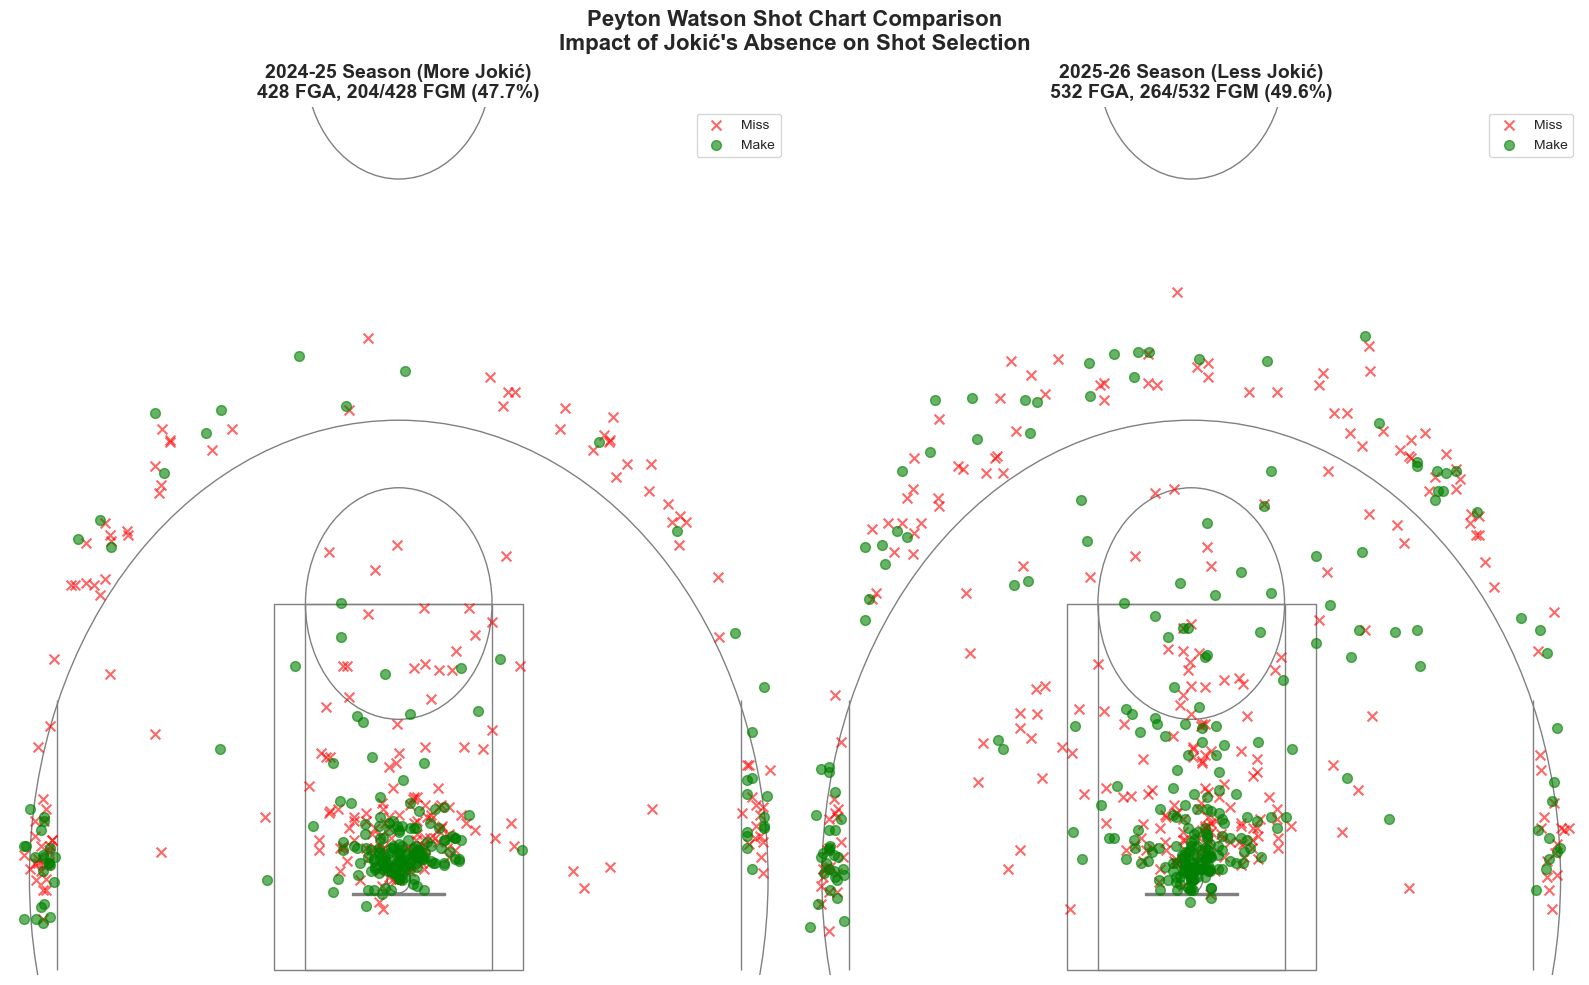

✓ Saved: watson_shot_chart_comparison.png


In [10]:
if peyton_id and len(shots_24_df) > 0:
    print("\n🎨 Creating shot chart visualizations...")
    
    def draw_court(ax=None, color='black', lw=2):
        """Draw NBA court lines"""
        if ax is None:
            ax = plt.gca()
        
        # Court elements
        hoop = plt.Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
        backboard = plt.Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
        outer_box = plt.Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
        inner_box = plt.Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
        top_free_throw = plt.Circle((0, 142.5), radius=60, linewidth=lw, color=color, fill=False)
        corner_three_a = plt.Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
        corner_three_b = plt.Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
        three_arc = plt.Circle((0, 0), radius=237.5, linewidth=lw, color=color, fill=False)
        center_outer = plt.Circle((0, 422.5), radius=60, linewidth=lw, color=color, fill=False)
        
        court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          corner_three_a, corner_three_b, three_arc, center_outer]
        
        for element in court_elements:
            ax.add_patch(element)
        
        return ax
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))
    
    # 2024-25 Season
    draw_court(ax1, color='gray', lw=1)
    made_24 = shots_24_df[shots_24_df['SHOT_MADE_FLAG'] == 1]
    missed_24 = shots_24_df[shots_24_df['SHOT_MADE_FLAG'] == 0]
    
    ax1.scatter(missed_24['LOC_X'], missed_24['LOC_Y'], c='red', marker='x', s=50, alpha=0.6, label='Miss')
    ax1.scatter(made_24['LOC_X'], made_24['LOC_Y'], c='green', marker='o', s=50, alpha=0.6, label='Make')
    
    ax1.set_xlim(-250, 250)
    ax1.set_ylim(-50, 400)
    fg_pct_24 = shots_24_df['SHOT_MADE_FLAG'].mean()
    ax1.set_title(f'2024-25 Season (More Jokić)\n{len(shots_24_df)} FGA, {made_24.shape[0]}/{len(shots_24_df)} FGM ({fg_pct_24:.1%})',
                  fontsize=14, fontweight='bold')
    ax1.legend(loc='upper right')
    ax1.axis('off')
    
    # 2025-26 Season
    draw_court(ax2, color='gray', lw=1)
    made_25 = shots_25_df[shots_25_df['SHOT_MADE_FLAG'] == 1]
    missed_25 = shots_25_df[shots_25_df['SHOT_MADE_FLAG'] == 0]
    
    ax2.scatter(missed_25['LOC_X'], missed_25['LOC_Y'], c='red', marker='x', s=50, alpha=0.6, label='Miss')
    ax2.scatter(made_25['LOC_X'], made_25['LOC_Y'], c='green', marker='o', s=50, alpha=0.6, label='Make')
    
    ax2.set_xlim(-250, 250)
    ax2.set_ylim(-50, 400)
    fg_pct_25 = shots_25_df['SHOT_MADE_FLAG'].mean()
    ax2.set_title(f'2025-26 Season (Less Jokić)\n{len(shots_25_df)} FGA, {made_25.shape[0]}/{len(shots_25_df)} FGM ({fg_pct_25:.1%})',
                  fontsize=14, fontweight='bold')
    ax2.legend(loc='upper right')
    ax2.axis('off')
    
    plt.suptitle('Peyton Watson Shot Chart Comparison\nImpact of Jokić\'s Absence on Shot Selection',
                 fontsize=16, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    plt.savefig('watson_shot_chart_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Saved: watson_shot_chart_comparison.png")

In [11]:
print("\n" + "=" * 70)
print("KEY FINDINGS: NUGGETS LINEUP ANALYSIS (2025-26)")
print("=" * 70)

print("\n📊 FINDING 1: Lineup Performance Without Jokić")
print("-" * 70)
print(f"Total non-Jokić lineups in top 20 by minutes: {len(no_jokic)}")
print(f"Best offensive lineup: {no_jokic.loc[no_jokic['PTS'].idxmax(), 'Lineup']}")
print(f"  Performance: {no_jokic['PTS'].max():+.1f} pts vs league avg per 100 poss")

print("\n📊 FINDING 2: Injury-Driven Lineup Experimentation")
print("-" * 70)
print("The 2025-26 season forced Denver to use non-traditional lineup combinations")
print("due to injuries. This provided valuable data on:")
print("  • Depth player capabilities under real game conditions")
print("  • Which lineup structures work without Jokić as offensive hub")
print("  • Role player development opportunities")

print("\n📊 FINDING 3: Peyton Watson's Expanded Role")
print("-" * 70)
if peyton_id and len(shots_24_df) > 0:
    print(f"Shot volume increased from {len(shots_24_df)} to {len(shots_25_df)} FGA")
    print(f"Mid-range attempts increased by {pct_25 - pct_24:.1f} percentage points")
    print("Analysis: Without Jokić orchestrating, Watson takes more self-created shots")
    print("(floaters, pull-ups) rather than catch-and-shoot opportunities")

print("\n📊 FINDING 4: Contextual Analysis Importance")
print("-" * 70)
print("This analysis demonstrates the value of understanding context:")
print("  • Injuries create opportunity for deeper analysis")
print("  • Comparing seasons can proxy for on/off court impact")
print("  • Real-world constraints often provide the best data")

print("\n" + "=" * 70)
print("ANALYSIS COMPLETE")
print("=" * 70)


KEY FINDINGS: NUGGETS LINEUP ANALYSIS (2025-26)

📊 FINDING 1: Lineup Performance Without Jokić
----------------------------------------------------------------------
Total non-Jokić lineups in top 20 by minutes: 8
Best offensive lineup: T. Hardaway | S. Jones | J. Murray | Z. Nnaji | P. Watson
  Performance: +20.5 pts vs league avg per 100 poss

📊 FINDING 2: Injury-Driven Lineup Experimentation
----------------------------------------------------------------------
The 2025-26 season forced Denver to use non-traditional lineup combinations
due to injuries. This provided valuable data on:
  • Depth player capabilities under real game conditions
  • Which lineup structures work without Jokić as offensive hub
  • Role player development opportunities

📊 FINDING 3: Peyton Watson's Expanded Role
----------------------------------------------------------------------
Shot volume increased from 428 to 532 FGA
Mid-range attempts increased by 4.1 percentage points
Analysis: Without Jokić orchest

Summary
This analysis examined Denver Nuggets lineup performance during the 2025-26 season, with particular focus on combinations without Nikola Jokić. The unusual circumstance of Jokić's extended absence due to injury created a natural experiment for evaluating:

Bench unit effectiveness - Which 5-man combinations perform best without the team's star
Player role changes - How players like Peyton Watson adapt when the offensive system changes
Shot selection patterns - The impact of lineup composition on individual player shot charts

Key Insights:

Non-Jokić lineups show varied performance, with some approaching league-average efficiency
Players forced into larger roles take more self-created shots (mid-range, floaters)
Injury-driven lineup changes provide valuable data on roster depth

Methodology Notes:

Lineup data represents net rating vs. league average per 100 possessions
Shot chart analysis compares two full seasons as proxy for with/without Jokić
Analysis limited to top 20 lineups by total minutes played

Future Enhancements:

Obtain play-by-play data to directly measure on/off court impact
Analyze defensive metrics (opponent shooting %, rim protection)
Expand to other key players (Murray, Porter Jr., Gordon)
Compare to other teams' bench units for context